Project 5: Amazon sentiment sleuth : Analyzing Product Reviews with LLMs

Obejective:
To analyze customer reviews from Amazon and classify them as positive, negative, or neutral
using Natural Language Processing (NLP) and Machine Learning (ML) techniques.

About File:
The dataset is a collection of reviews written in the Amazon.com marketplace for a product(Applicances).
This is intended to facilitate study into the properties
of customer reviews potentially including how people evaluate and express their experiences with respect to products at scale.

In [4]:
#installing neccessary libraries
#!pip install nltk
import nltk
#nltk.download('punkt_tab') 
#nltk.download('stopwords') # Download the stop words list
#nltk.download('wordnet') # For lexical database
#nltk.download('omw-1.4') # Optional for extended multilingual support

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 15.9 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [regex]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ----------------------

In [40]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk #Python library for working with text
from nltk.tokenize import word_tokenize ## Tokenizing into word
from nltk.tokenize import sent_tokenize ## Tokenizing into sentence
from nltk.corpus import stopwords ## Stopwords
from nltk.stem import PorterStemmer # Stemming algorithm
# We need WordNet and Punkt for tokenization and lemmatization
from nltk.corpus import wordnet # for WordNet-compatible POS tags
from nltk.tag import pos_tag # to assign POS tags to words
from nltk.stem import WordNetLemmatizer # from NLTK for lemmatization

import re ## Regular Expression

In [41]:
#1) load dataset

import json

data = []
with open('amazon_reviews.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
print(df.head())

   overall  verified   reviewTime      reviewerID        asin  \
0      5.0      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1      5.0      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2      5.0      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3      5.0      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4      5.0      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   

                       style     reviewerName  \
0  {'Style:': ' Dryer Vent'}    James. Backus   
1       {'Size:': ' 6-Foot'}           kevin.   
2       {'Size:': ' 6-Foot'}        CDBrannom   
3       {'Size:': ' 6-Foot'}  Calvin E Reames   
4       {'Size:': ' 6-Foot'}   albert j. kong   

                                          reviewText        summary  \
0  I like this as a vent as well as something tha...  Great product   
1                                          good item     Five Stars   
2                     Fit my new LG dryer perfectly.     Five Stars   
3                     Good val

In [42]:
#2) Data exploration

df.shape ## Checking the shape—i.e. size—of the data
df.info() ##Learning the data types of columns
df.describe().T ## Getting the statistical summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         2277 non-null   float64
 1   verified        2277 non-null   bool   
 2   reviewTime      2277 non-null   object 
 3   reviewerID      2277 non-null   object 
 4   asin            2277 non-null   object 
 5   style           38 non-null     object 
 6   reviewerName    2277 non-null   object 
 7   reviewText      2277 non-null   object 
 8   summary         2277 non-null   object 
 9   unixReviewTime  2277 non-null   int64  
 10  vote            2074 non-null   object 
 11  image           828 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 198.0+ KB


,count,mean,std,min,25%,50%,75%,max
overall,2277.0,4.499780e+00,8.377227e-01,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,2277.0,1.457410e+09,5.639808e+07,1.221523e+09,1.449274e+09,1.478650e+09,1.482278e+09,1.523923e+09


In [43]:
#3) Data Cleaning and processing
# Checking for the missing values
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

# Drop columns with any missing values and are not necessary
df = df.dropna(axis=1)
print(df)

Missing Values by Column
------------------------------
overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             2239
reviewerName         0
reviewText           0
summary              0
unixReviewTime       0
vote               203
image             1449
dtype: int64
------------------------------
TOTAL MISSING VALUES: 3891
      overall  verified   reviewTime      reviewerID        asin  \
0         5.0      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1         5.0      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2         5.0      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3         5.0      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4         5.0      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   
...       ...       ...          ...             ...         ...   
2272      5.0      True   12 6, 2016  A2B2JVUX5YN8RU  B0006GVNOA   
2273      5.0      True  03 20, 2016  A1IT56MV1C09VS 

In [14]:
# Print duplicate rows
print(df.duplicated().sum()) #2072 duplicates

# Remove duplicate rows
df = df.drop_duplicates()
print(df)




2072
      overall  verified   reviewTime      reviewerID        asin  \
0         5.0      True  08 22, 2013  A34A1UP40713F8  B00009W3I4   
1         5.0      True   02 8, 2016  A1AHW6I678O6F2  B00009W3PA   
2         5.0      True   08 5, 2015   A8R48NKTGCJDQ  B00009W3PA   
3         5.0      True  04 24, 2015   AR3OHHHW01A8E  B00009W3PA   
4         5.0      True  03 21, 2015  A2CIEGHZ7L1WWR  B00009W3PA   
...       ...       ...          ...             ...         ...   
2262      5.0      True  08 29, 2014  A1H2V1GNEY4LZ0  B00W4YKCGC   
2263      5.0      True  08 11, 2014   AVGG8CYK8K312  B00W4YKCGC   
2274      5.0      True  10 15, 2016  A13391AZAFJ67K  B00570RQ0A   
2275      5.0      True   01 5, 2016  A2V0JXLJ9VCNNX  B00570RQ0A   
2276      5.0      True   12 5, 2016  A3GP2HMB2AFOKF  B00W4YKCGC   

         reviewerName                                         reviewText  \
0       James. Backus  I like this as a vent as well as something tha...   
1              kevin.     

Exploratory Data Analysis:

Generate a bar plot showing the distribution of review scores, 
this helps to visualize the distribution of reviews based on star ratings

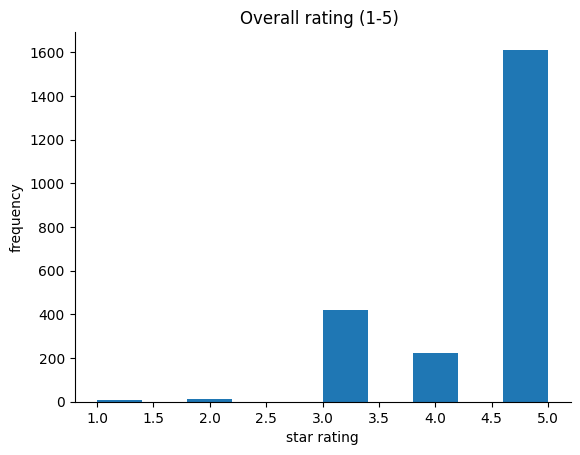

In [44]:
# Exploratory data analysis
from matplotlib import pyplot as plt
df['overall'].plot(kind='hist', bins=10, title='Overall rating (1-5) ')
plt.xlabel('star rating')
plt.ylabel('frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

Above Graph shows that most of the reviews are positive, and the negative reviews are very few.

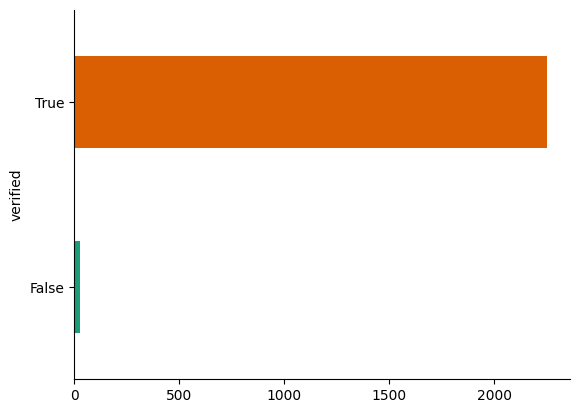

In [45]:
#Generate Bar Graph to see if the reviews are verified
df.groupby('verified').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Above Graph shows that reviews are mostly from verified customers

In [46]:
# Rename  columns to comman name using a dictionary
df_renamed = df.rename(columns={'asin': 'Product_ID', 'reviewText': 'Reviews'})


In [47]:
# Write the cleaned DataFrame to a CSV file
# 'output.csv' is the desired file name
# index=False prevents writing the DataFrame index as a column in the CSV
df_renamed.to_csv('amazon_reviews.csv', index=False) 